In [6]:
import serial
import time
import csv


serial_port = '/dev/cu.usbmodem113301'  # macOS port
baud_rate = 9600
file_name = "distance_data.csv"


ser = serial.Serial(serial_port, baud_rate, timeout=5)


with open(file_name, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp", "Distance (cm)"])
    
    print("Recording data (240 samples = 20 minutes)...")
    
    for _ in range(240): 
        line = ser.readline().decode('utf-8').strip()
        if line and "Error" not in line:
            try:
                millis, distance = line.split(",")
                timestamp = time.strftime("%Y%m%d%H%M%S")
                writer.writerow([timestamp, distance])
                print(f"{timestamp}, {distance} cm")
            except ValueError:
                print("Invalid line:", line)

ser.close()
print("Done collecting 240 samples.")

Recording data (240 samples = 20 minutes)...
20250508225722, 16.10 cm
20250508225732, 29.51 cm
20250508225742, 228.92 cm
20250508225752, 791.08 cm
20250508225802, 6.78 cm
20250508225812, 792.39 cm
20250508225822, 29.16 cm
20250508225832, 2.30 cm
20250508225842, 28.59 cm
20250508225852, 26.16 cm
20250508225902, 66.04 cm
20250508225912, 48.96 cm
20250508225922, 231.69 cm
20250508225932, 8.30 cm
20250508225942, 16.68 cm
20250508225952, 2.62 cm
20250508230002, 28.31 cm
20250508230012, 232.10 cm
20250508230022, 231.81 cm
20250508230032, 68.46 cm
20250508230042, 69.99 cm
20250508230052, 230.83 cm
20250508230102, 331.69 cm
20250508230112, 231.32 cm
20250508230122, 373.97 cm
20250508230132, 230.93 cm
20250508230142, 230.89 cm
20250508230152, 231.37 cm
20250508230202, 231.69 cm
20250508230213, 231.27 cm
20250508230223, 232.51 cm
20250508230233, 203.39 cm
20250508230243, 232.27 cm
20250508230253, 230.98 cm
20250508230303, 230.59 cm
20250508230313, 55.74 cm
20250508230323, 49.38 cm
20250508230333

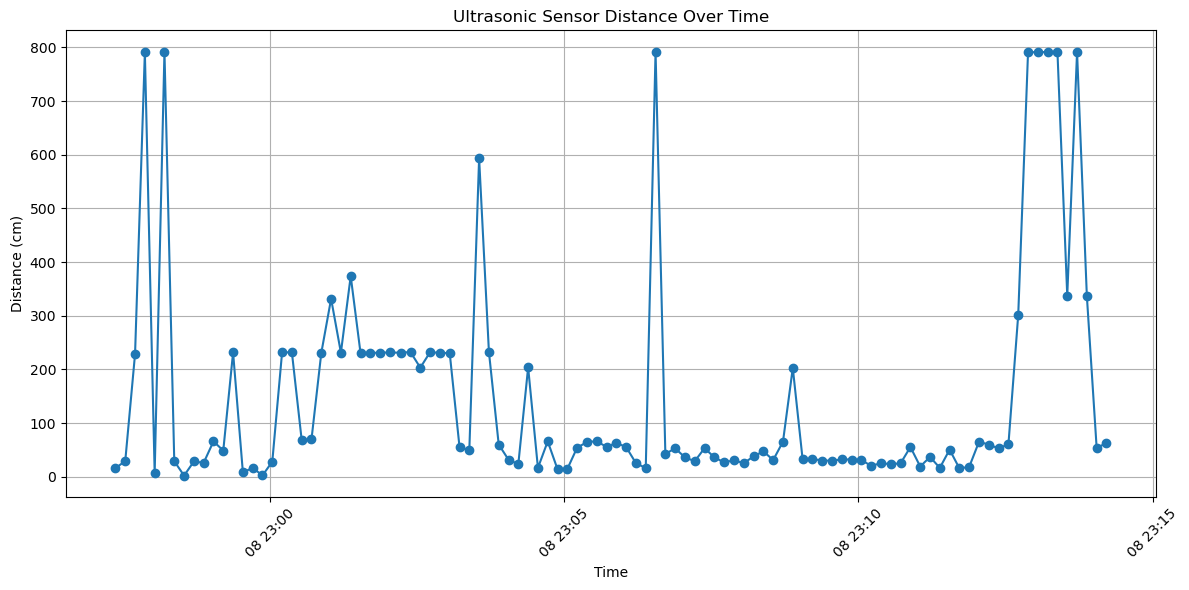

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("distance_data.csv")


df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d%H%M%S')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Distance (cm)'], marker='o', linestyle='-')
plt.title("Ultrasonic Sensor Distance Over Time")
plt.xlabel("Time")
plt.ylabel("Distance (cm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()